# <center>UE22CS342AA2 - Data Analytics - Worksheet 4c</center>

# <center>Knowledge-based recommender systems</center>

<center> Designed by Amritha GK, PESU-25  </center>

<br>

- Student name: Aditya P 
- SRN: PES1UG22CS040
- Section: 'A'

<br>

Knowledge-based recommender systems are helpful when dealing with domains where user preferences are complex and the item/target contains a large number of attributes. They also help in overcoming challenges such as the cold-start problem, which occur with content-based or collaborative filtering techniques.

There are mainly two types of Knowledge-based recommender systems: Contraint-based and Case-based.

With this exercise, we will be diving into **simple case-based recommender systems**.


The dataset contains several attributes regarding pre-owned cars, which are listed below:

1. ID

2. Price - in dollars

3. Manufacturer

4. Model

5. Prod. year

6. Category - based on body type

7. Leather interior - "Yes" or "No"

8. Fuel type

9. Engine volume - in litres

10. Mileage - here, the distance travelled by the car, in km.

11. Cylinders - number of cylinders in the engine

12. Gear box type - the type of transmission

13. Drive wheels - drivetrain configuration

14. Doors - number of doors

15. Wheel - the side of the steering wheel

16. Color

17. Airbags - number of airbags



#### The task is to build a simple Case-based Recommender System to recommend these cars to prospective buyers.


#### Breakdown of points:

|Sl. No.| Criterion | Points |
|--| :--------- | ------ |
|1| Data exploration and Preprocessing | 3 points |
|2| Case-based model | 3 points |
|3| Explanation of the model workflow | 3 points |


### Note:

- The model must take a target instance as input from the user

- Use suitable similarity metrics

- For ease of implementation, provide simple critiquing for any **one** feature of your choice, to improve recommendations

## Imports and Loading the data

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/preowned-cars-dataset/Worksheet-4c_preowned_cars_dataset.csv")

In [3]:
df.shape

(19197, 17)

In [4]:
df.columns

Index(['ID', 'Price', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

## 1. EDA and Preprocessing

In [5]:
# Your code here
# Basic EDA
print("Dataset Shape:", df.shape)
print("\nColumns and Data Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nBasic Statistics:\n", df.describe())

Dataset Shape: (19197, 17)

Columns and Data Types:
 ID                    int64
Price                 int64
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

Missing Values:
 ID                  0
Price               0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

Basic Statistics:
                  ID         Pric

In [6]:
# Check unique values in categorical columns
categorical_cols = ['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Gear box type',
                    'Drive wheels', 'Doors', 'Wheel', 'Color']
for col in categorical_cols:
    print(f"Unique values in {col}:", df[col].unique())


Unique values in Manufacturer: ['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ' 'CITROEN'
 'LAND ROVER' 'MINI' 'DODGE' 'CHRYSLER' 'JAGUAR' 'ISUZU' 'SKODA'
 'DAIHATSU' 'BUICK' 'TESLA' 'CADILLAC' 'PEUGEOT' 'BENTLEY' 'VOLVO' 'HAVAL'
 'HUMMER' 'SCION' 'UAZ' 'MERCURY' 'ZAZ' 'ROVER' 'SEAT' 'LANCIA' 'MOSKVICH'
 'MASERATI' 'FERRARI' 'SAAB' 'LAMBORGHINI' 'ROLLS-ROYCE' 'PONTIAC'
 'SATURN' 'ASTON MARTIN' 'GREATWALL']
Unique values in Model: ['RX 450' 'Equinox' 'FIT' ... 'E 230 124' 'RX 450 F SPORT' 'Prius C aqua']
Unique values in Category: ['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']
Unique values in Leather interior: ['Yes' 'No']
Unique values in Fuel type: ['Hybrid' 'Petrol' 'Diesel' 'CNG' 'Plug-in 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


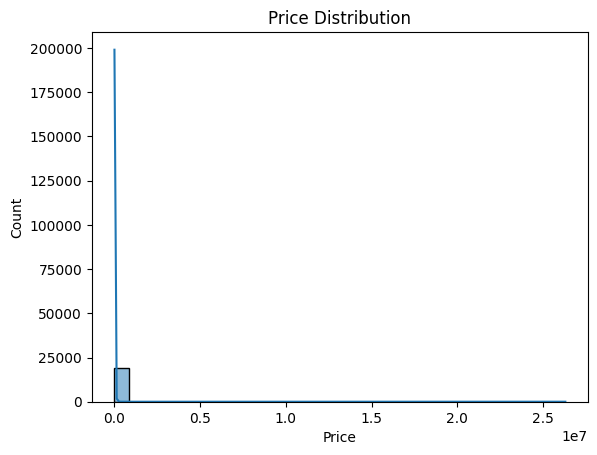

In [7]:
# Visualize distributions
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.show()

### Transforming some columns for better representation

Many columns here are given as an 'Object' type and have to be converted to the suitable format for our usage.\

Below is an example for the column "Engine Volume".



Do you see any other columns that might require a similar transformation? If yes, transform the column(s) and proceed with the EDA.

In [ ]:
## Currently, both the engine volume and presence of turbocharging are mentioned in the same column as a string. 

## Here, we split them into two different columns and transform them as required

# df[['Engine volume', 'Turbo']] = df['Engine volume'].str.extract(r'(\d+\.?\d*)\s*(Turbo)?')

# df['Engine volume'] = df['Engine volume'].astype(float)



# # Replace 'Turbo' and 'NaN' with 1 and 0 as Binary Encoding]

#df['Turbo'] = df['Turbo'].apply(lambda x: 1 if x == 'Turbo' else 0)

In [8]:
# Your code here

df['Engine volume'].str.extract(r'(\d+\.?\d*)\s*(Turbo)?')

,0,1
0,3.5,NaN
1,3,NaN
2,1.3,NaN
3,2.5,NaN
4,1.3,NaN
...,...,...
19192,2.0,Turbo
19193,2.4,NaN
19194,2,NaN
19195,2,NaN


In [9]:
## Currently, both the engine volume and presence of turbocharging are mentioned in the same column as a string.

## Here, we split them into two different columns and transform them as required

df[['Engine volume', 'Turbo']] = df['Engine volume'].str.extract(r'(\d+\.?\d*)\s*(Turbo)?')
df['Engine volume'] = df['Engine volume'].astype(float)

In [10]:
# Remove any non-numeric characters except for periods (.) for decimals
df['Mileage'] = df['Mileage'].replace(r'[^0-9.]', '', regex=True)

# Convert the cleaned 'Mileage' column to numeric (coerce invalid values to NaN)
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19197 entries, 0 to 19196
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19197 non-null  int64  
 1   Price             19197 non-null  int64  
 2   Manufacturer      19197 non-null  object 
 3   Model             19197 non-null  object 
 4   Prod. year        19197 non-null  int64  
 5   Category          19197 non-null  object 
 6   Leather interior  19197 non-null  object 
 7   Fuel type         19197 non-null  object 
 8   Engine volume     19197 non-null  float64
 9   Mileage           19197 non-null  int64  
 10  Cylinders         19197 non-null  float64
 11  Gear box type     19197 non-null  object 
 12  Drive wheels      19197 non-null  object 
 13  Doors             19197 non-null  object 
 14  Wheel             19197 non-null  object 
 15  Color             19197 non-null  object 
 16  Airbags           19197 non-null  int64 

In [12]:
# # Replace 'Turbo' and 'NaN' with 1 and 0 as Binary Encoding]
df['Turbo'] = df['Turbo'].apply(lambda x: 1 if x == 'Turbo' else 0)

### Perform visualizations and explore the data further, Clean the dataset

In [13]:
# Your code here
# Handle missing values by filling them with the median for numerical features
df.fillna(df.median(numeric_only=True), inplace=True)

In [14]:
# Check for missing values again
print("\nMissing Values After Cleaning:\n", df.isnull().sum())


Missing Values After Cleaning:
 ID                  0
Price               0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
Turbo               0
dtype: int64


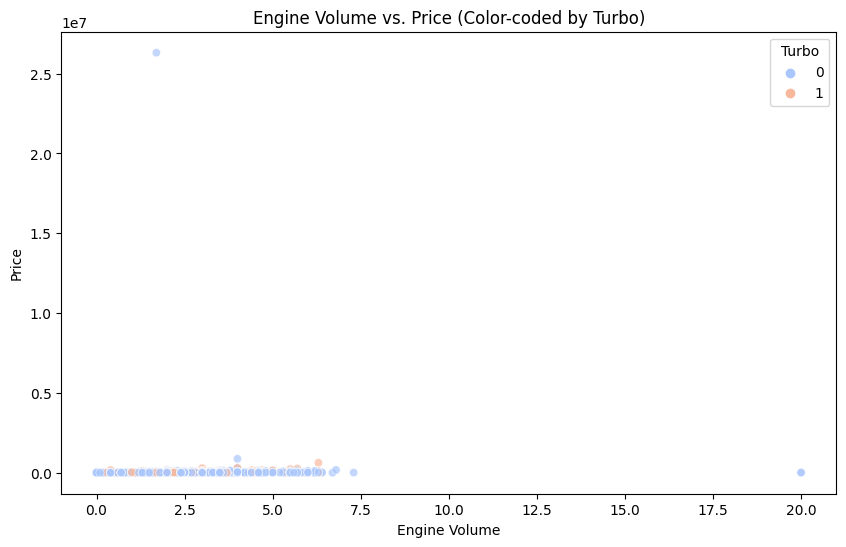

In [15]:
# Visualizing 'Engine volume' vs. 'Price' to understand the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Engine volume', y='Price', hue='Turbo', palette='coolwarm', alpha=0.7)
plt.title('Engine Volume vs. Price (Color-coded by Turbo)')
plt.xlabel('Engine Volume')
plt.ylabel('Price')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


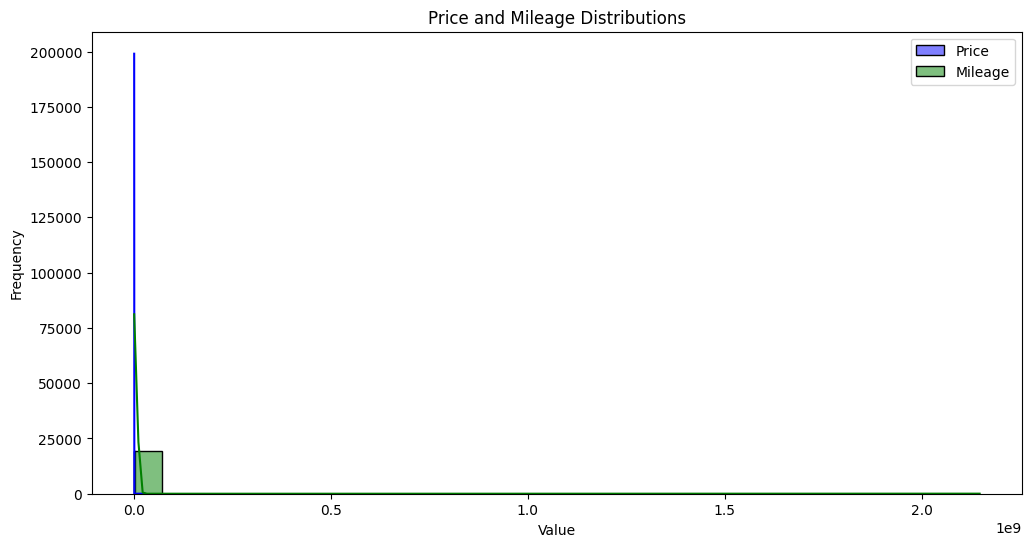

In [16]:
# Visualizing the distribution of 'Price' and 'Mileage'
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='blue', label='Price')
sns.histplot(df['Mileage'], bins=30, kde=True, color='green', label='Mileage')
plt.legend()
plt.title('Price and Mileage Distributions')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

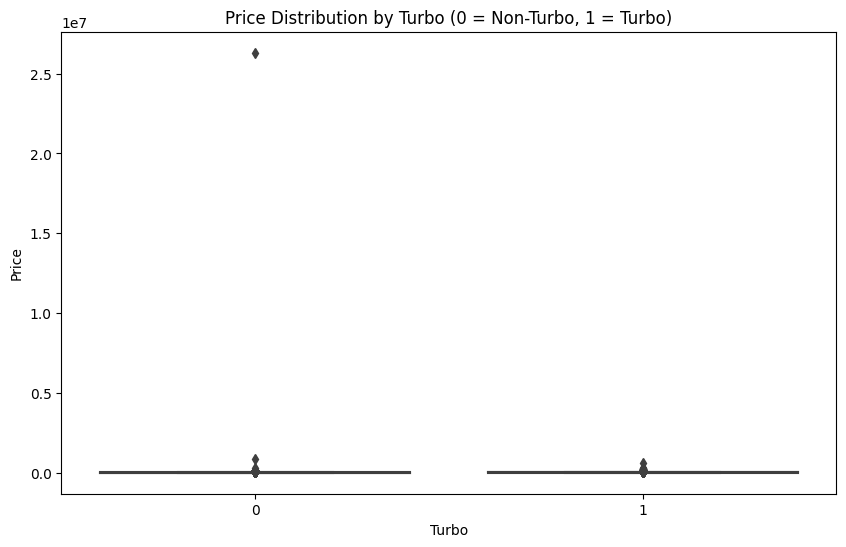

In [17]:
# Checking the relationship between 'Turbo' and 'Price'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Turbo', y='Price', data=df)
plt.title('Price Distribution by Turbo (0 = Non-Turbo, 1 = Turbo)')
plt.xlabel('Turbo')
plt.ylabel('Price')
plt.show()

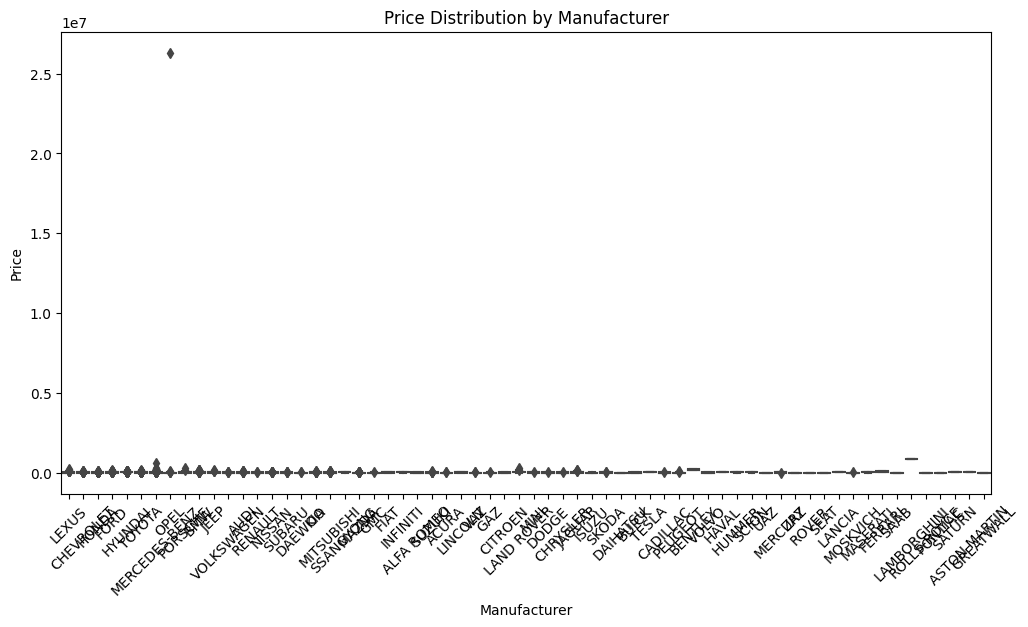

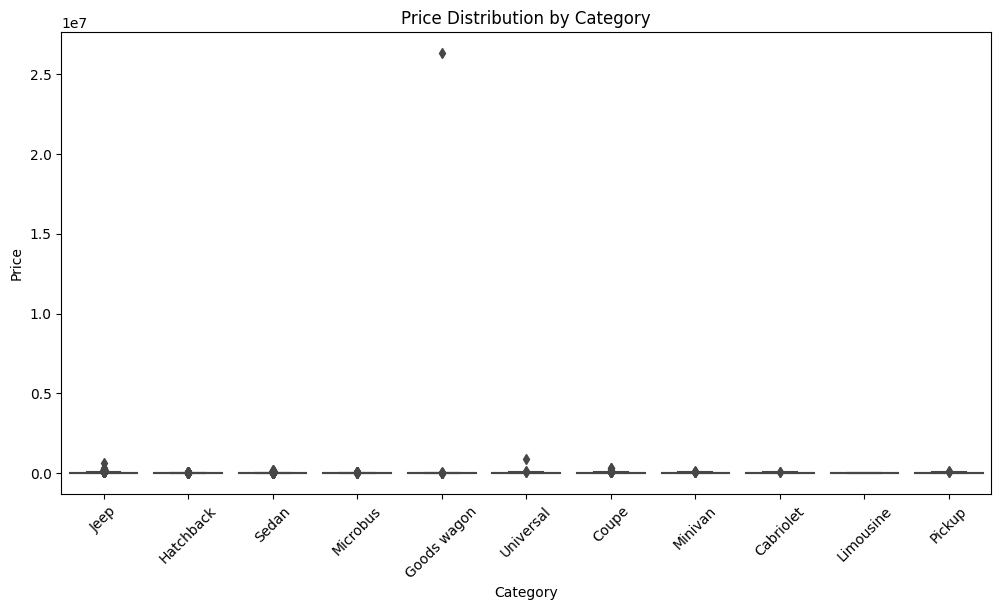

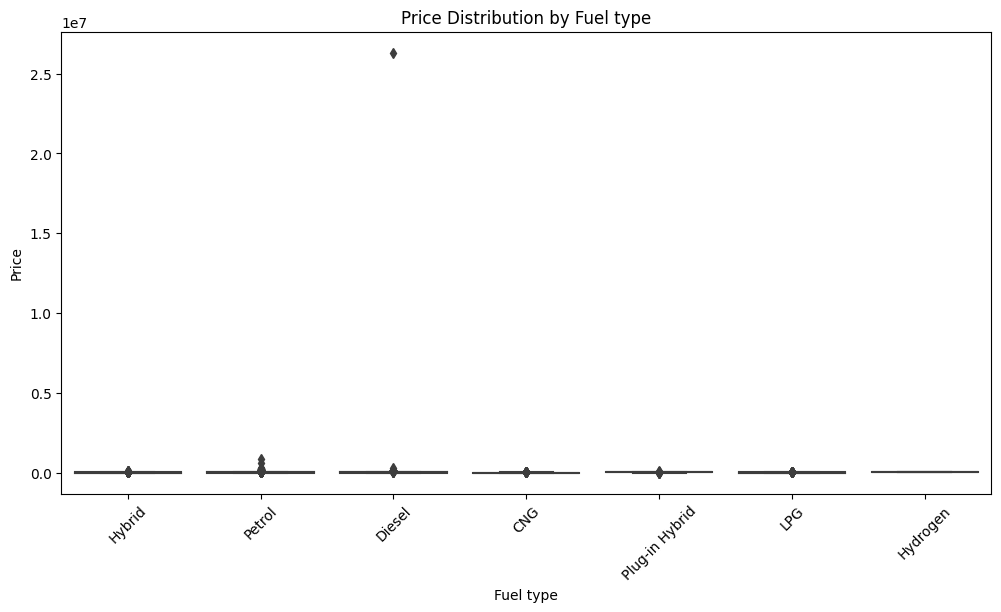

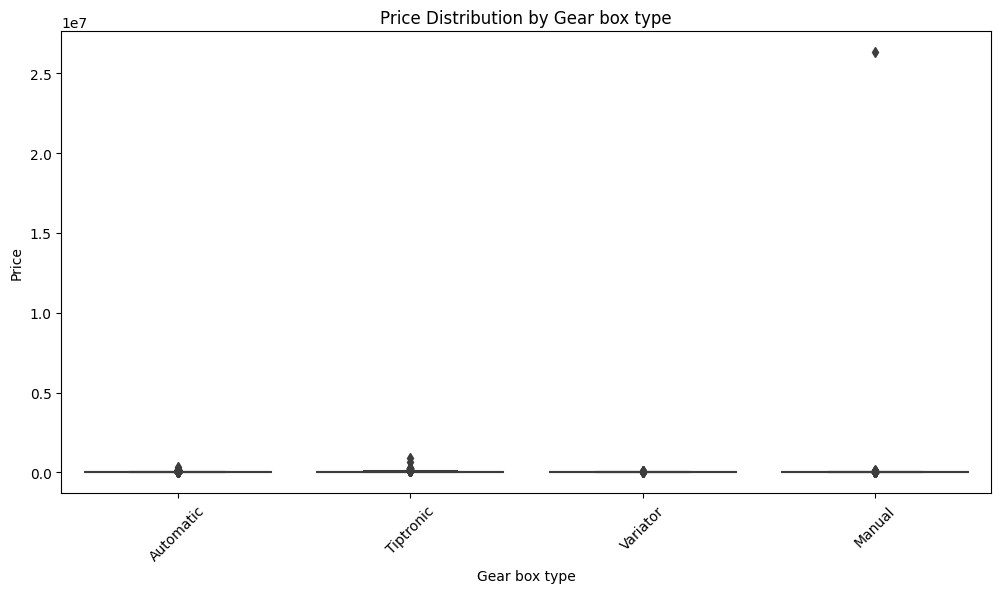

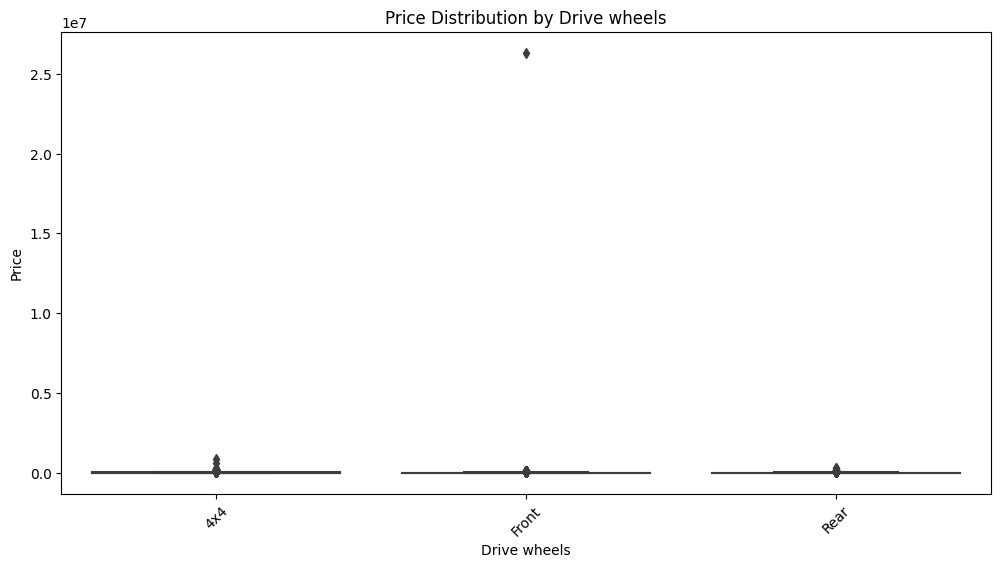

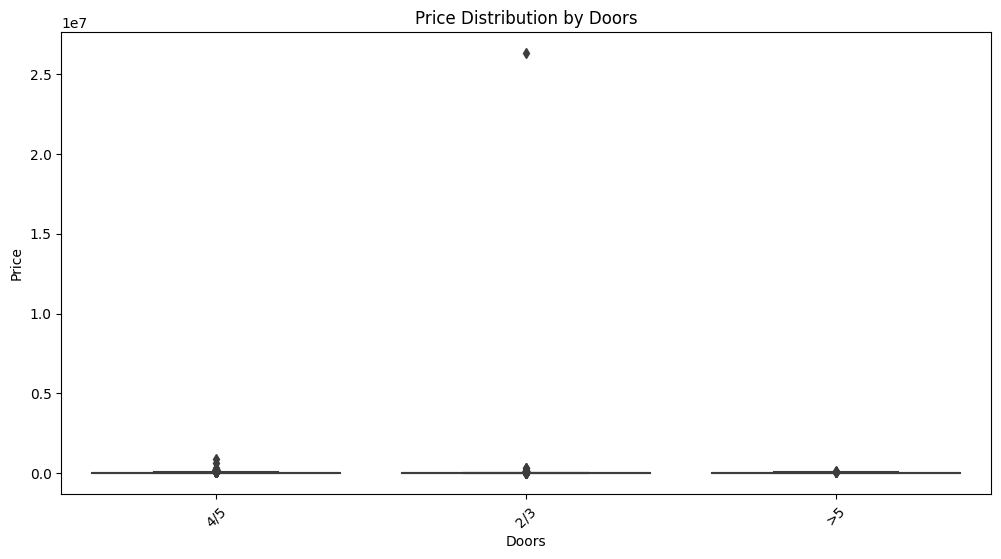

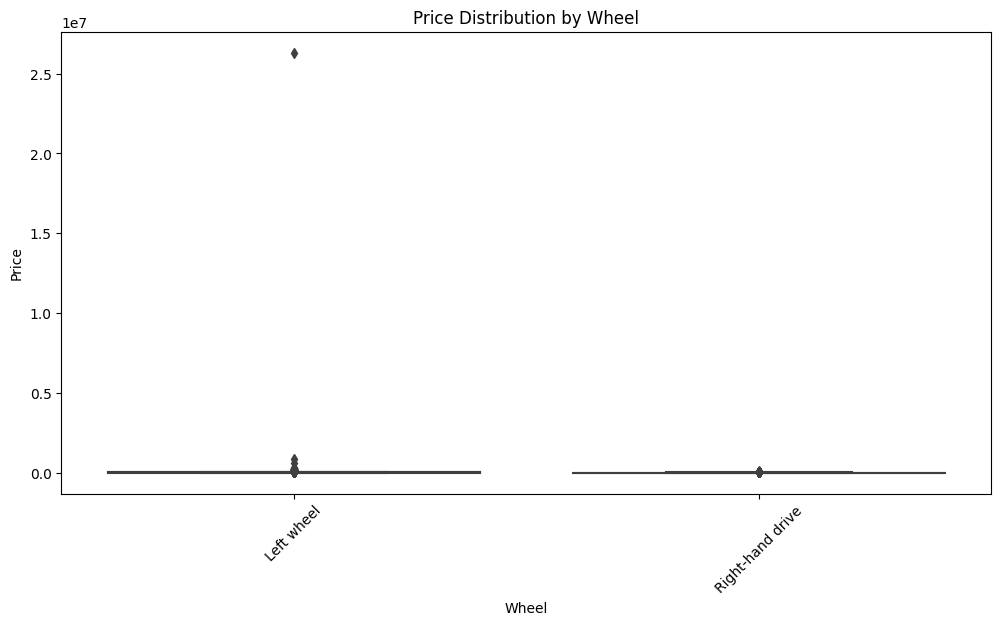

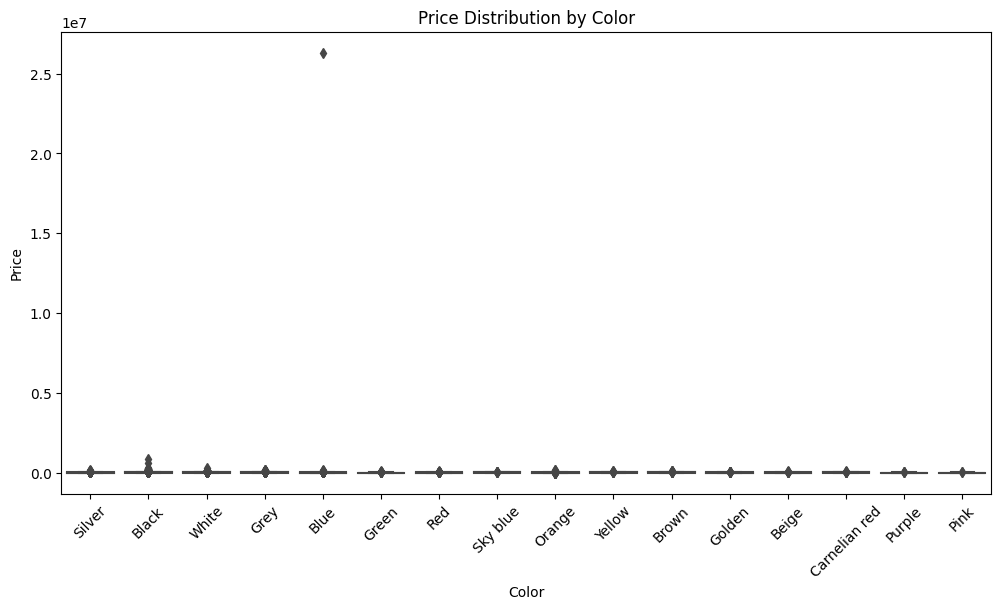

In [18]:
# Visualizing categorical variables to see their impact on 'Price'
categorical_cols = ['Manufacturer', 'Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=col, y='Price', data=df)
    plt.title(f'Price Distribution by {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

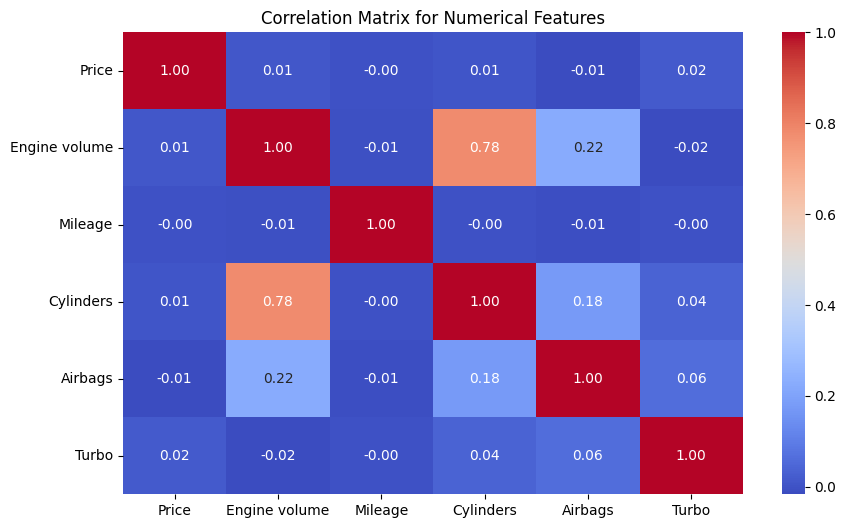

In [19]:
# Correlation heatmap for numerical variables
numeric_cols = ['Price', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags', 'Turbo']
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Features')
plt.show()

In [20]:
# Feature Engineering: Removing extreme outliers (if any)
# Assuming that the values of 'Price' or 'Mileage' beyond a certain threshold are outliers
price_threshold = df['Price'].quantile(0.95)  # Upper 5% for price
mileage_threshold = df['Mileage'].quantile(0.95)  # Upper 5% for mileage

df_cleaned = df[(df['Price'] <= price_threshold) & (df['Mileage'] <= mileage_threshold)]

# Check the shape of cleaned dataset
print("\nCleaned Dataset Shape:", df_cleaned.shape)


Cleaned Dataset Shape: (17288, 18)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


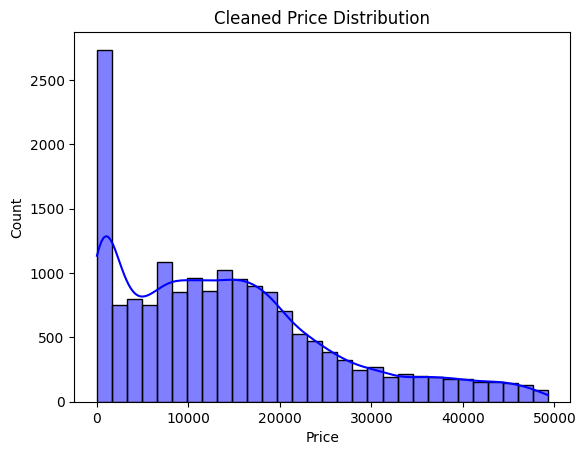


Cleaned Data Sample:
          ID  Price Manufacturer    Model  Prod. year   Category  \
0  45654403  13328        LEXUS   RX 450        2010       Jeep   
1  44731507  16621    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467        HONDA      FIT        2006  Hatchback   
3  45769185   3607         FORD   Escape        2011       Jeep   
4  45809263  11726        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type  Engine volume  Mileage  Cylinders Gear box type  \
0              Yes    Hybrid            3.5   186005        6.0     Automatic   
1               No    Petrol            3.0   192000        6.0     Tiptronic   
2               No    Petrol            1.3   200000        4.0      Variator   
3              Yes    Hybrid            2.5   168966        4.0     Automatic   
4              Yes    Petrol            1.3    91901        4.0     Automatic   

  Drive wheels Doors             Wheel   Color  Airbags  Turbo  
0          4x4   4/5  

In [21]:
# Visualize the cleaned data
sns.histplot(df_cleaned['Price'], bins=30, kde=True, color='blue')
plt.title('Cleaned Price Distribution')
plt.show()

# Final cleaned dataset after processing
print("\nCleaned Data Sample:\n", df_cleaned.head())

In [22]:
df.columns

Index(['ID', 'Price', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Turbo'],
      dtype='object')

## 2. Case-based model

Points to consider:

- Use suitable similarity metrics

- The model must take a target instance as input from the user

- <b>For ease of implementation, provide simple critiquing for any 1 feature of your choice, to improve recommendations</b>

### Similarity meaures

Since this dataset has attributes of both numerical and categorical types, we need to use suitable similarity measures for each.



For numerical attributes, we can use the Euclidean distance metric or cosine similarity.



Here are some measures that could be used for categorical attributes: 

- Hamming Distance

- Jaccard Similarity

- Converting them into Dense Vectors (as embeddings) by training a Neural Network



Techniques like <b>Metric Learning</b> can be used to construct task-specific distance metrics using Machine Learning.



You could explore the below paper to learn about some more similarity measures for categorical variables:

https://epubs.siam.org/doi/pdf/10.1137/1.9781611972788.22?download=true






In [59]:
# Your code here
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score

In [60]:
# Sample DataFrame (Assuming df is loaded with the given columns)
# Handle missing values (use median for numerical columns, most frequent for categorical columns)
df = df.fillna(df.median(numeric_only=True))

In [61]:
# Step 1: Preprocess numerical columns (e.g., scaling)
numerical_cols = ['Price', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [62]:
# Step 2: Preprocess categorical columns (e.g., one-hot encoding or label encoding)
categorical_cols = ['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
                    'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']

In [63]:
# Label Encoding for simplicity (or use one-hot encoding for more granularity)
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [64]:
# Step 3: Function to calculate similarity between numerical attributes
def numerical_similarity(target_instance, df, numerical_cols):
    # Convert target instance to DataFrame
    target_instance_df = pd.DataFrame([target_instance], columns=numerical_cols)

    # Calculate Euclidean distance between target and dataset for numerical columns
    target_numeric = target_instance_df[numerical_cols].values
    df_numeric = df[numerical_cols].values
    return pairwise_distances(target_numeric, df_numeric, metric='euclidean').flatten()

In [65]:
# Step 4: Function to calculate similarity between categorical attributes (Jaccard similarity or Hamming)
def categorical_similarity(target_instance, df, categorical_cols):
    # Convert target instance to DataFrame
    target_instance_df = pd.DataFrame([target_instance], columns=categorical_cols)

    # Calculate Jaccard similarity for categorical features (using weighted average for multiclass)
    target_categorical = target_instance_df[categorical_cols].values
    df_categorical = df[categorical_cols].values

    # Apply weighted average for multiclass problems
    jaccard_similarities = []
    for row in df_categorical:
        jaccard_sim = jaccard_score(target_categorical[0], row, average='weighted', zero_division=1)
        jaccard_similarities.append(jaccard_sim)

    return jaccard_similarities

In [66]:
# Step 5: Function to recommend similar items
def get_similar_items(target_instance, df, numerical_cols, categorical_cols, n_neighbors=5):
    # Compute numerical and categorical similarities
    numerical_sim = numerical_similarity(target_instance, df, numerical_cols)
    categorical_sim = categorical_similarity(target_instance, df, categorical_cols)

    # Combine numerical and categorical similarities (simple sum for this example)
    combined_sim = numerical_sim + categorical_sim

    # Find the indices of the most similar cars
    similar_indices = np.argsort(combined_sim)[:n_neighbors]
    return df.iloc[similar_indices], combined_sim[similar_indices]

In [67]:
# Step 6: Provide critique based on one feature (e.g., Price)
def critique_price_recommendation(similar_items):
    avg_price = similar_items['Price'].mean()
    min_price = similar_items['Price'].min()
    max_price = similar_items['Price'].max()

    critique = f"The average price of the recommended cars is {avg_price:.2f}.\n"
    critique += f"The lowest price among them is {min_price:.2f} and the highest price is {max_price:.2f}.\n"

    # Suggest improvements based on the price range
    if avg_price < 20000:
        critique += "Consider increasing the price range for higher quality or newer models."
    elif avg_price > 40000:
        critique += "Consider reducing the price for better market competitiveness."

    return critique

### Obtaining the user input for the target case

In [77]:
# Your code here
# Step 7: Example of a target instance (can be input by the user)
target_instance = {
    'Price': -7.40264, 'Engine volume': 1.11039, 'Mileage': 3.701322, 
    'Cylinders': 2.014373, 'Airbags': 1.254074,
    'Manufacturer': 30, 'Model': 1100, 'Category': 8, 'Leather interior': 1,
    'Fuel type': 5,
    'Gear box type': 2, 'Drive wheels': 0, 'Doors': 2, 'Wheel': 1, 
    'Color': 7, 'Turbo': 0
}

In [78]:
# Convert target instance into a DataFrame
target_instance_df = pd.DataFrame([target_instance])

In [79]:
# Preprocess the target instance similarly to the DataFrame
target_instance_processed = target_instance_df.copy()
target_instance_processed[numerical_cols] = scaler.transform(target_instance_processed[numerical_cols])

In [80]:
# Label encode categorical features of the target instance
for col in categorical_cols:
    target_instance_processed[col] = label_encoders[col].transform(target_instance_processed[col].astype(str))

In [81]:
# Get similar items for the target instance
similar_items, distances = get_similar_items(target_instance, df, numerical_cols, categorical_cols)

In [82]:
# Display the similar items
print("Recommended Similar Cars Based on Features:\n", similar_items[['Manufacturer', 'Model', 'Price',
                                                                      'Mileage', 'Engine volume']])

Recommended Similar Cars Based on Features:
        Manufacturer  Model     Price   Mileage  Engine volume
18437            30   1085 -0.039623  2.261492       0.446615
1399             45   1431 -0.049484  1.114928       0.560528
1672             54   1368 -0.096479 -0.027967       1.130093
11203            54   1477 -0.095850 -0.030919       0.788354
4112             54   1477 -0.095850 -0.030939       0.788354


In [83]:
# Critique the price feature
price_critique = critique_price_recommendation(similar_items)
print("\nPrice Critique and Suggestions for Improvement:\n", price_critique)


Price Critique and Suggestions for Improvement:
 The average price of the recommended cars is -0.08.
The lowest price among them is -0.10 and the highest price is -0.04.
Consider increasing the price range for higher quality or newer models.


### Making recommendations

Display the top-10 recommendations

In [84]:
# Your code here
# Function to get the top-N similar items (10 in this case)
def get_top_n_similar_items(target_instance, df, numerical_cols, categorical_cols, n_neighbors=10):
    # Get numerical and categorical similarities
    numerical_sim = numerical_similarity(target_instance, df, numerical_cols)
    categorical_sim = categorical_similarity(target_instance, df, categorical_cols)

    # Combine the numerical and categorical similarities
    combined_sim = numerical_sim + categorical_sim

    # Find the indices of the most similar cars
    similar_indices = np.argsort(combined_sim)[:n_neighbors]
    return df.iloc[similar_indices], combined_sim[similar_indices]

In [85]:
# Get the top-10 similar items for the target instance
similar_items, distances = get_top_n_similar_items(target_instance, df, numerical_cols, categorical_cols, n_neighbors=10)

In [86]:
# Display the top-10 recommendations
print("Top 10 Recommended Similar Cars Based on Features:\n", similar_items[['Manufacturer', 'Model',
                                                                             'Price', 'Mileage', 'Engine volume']])

Top 10 Recommended Similar Cars Based on Features:
        Manufacturer  Model     Price   Mileage  Engine volume
18437            30   1085 -0.039623  2.261492       0.446615
1399             45   1431 -0.049484  1.114928       0.560528
1672             54   1368 -0.096479 -0.027967       1.130093
11203            54   1477 -0.095850 -0.030919       0.788354
4112             54   1477 -0.095850 -0.030939       0.788354
3549             54   1477 -0.095850 -0.031001       0.788354
4574             54   1477 -0.095850 -0.031022       0.788354
7488             54   1477 -0.095850 -0.031682       0.788354
5140             20   1345 -0.096338 -0.027178       0.788354
12595            26    242 -0.092228 -0.024219       1.357919


In [87]:
# You can optionally print the distances to the target instance to better understand the closeness
print("\nDistances to the Target Instance:\n", distances)


Distances to the Target Instance:
 [7.92058203 8.08018047 8.27014487 8.27829914 8.27830848 8.27833648
 8.27834581 8.27864449 8.28451004 8.29090877]


### Critiquing



Implement Simple Directional Critiquing for any **one** feature of the dataset and display the updated recommendations(top-10)

In [88]:
# Your code here
# Function to apply directional critique to the price feature
def apply_price_critique(target_instance, df, price_critique='lower'):
    """
    Adjust the price similarity based on the critique.
    'lower' means prefer cheaper items, 'higher' means prefer more expensive items.
    """
    # Extract the target price
    target_price = target_instance['Price']

    # If the critique is 'lower', penalize higher prices, else penalize lower prices
    if price_critique == 'lower':
        # Penalize cars with higher prices
        df['Price'] = df['Price'].apply(lambda x: target_price - abs(target_price - x)
        if x > target_price else target_price + abs(target_price - x))
    elif price_critique == 'higher':
        # Penalize cars with lower prices
        df['Price'] = df['Price'].apply(lambda x: target_price + abs(target_price - x)
        if x < target_price else target_price - abs(target_price - x))

    return df

In [89]:
# Function to get the top-N similar items (updated after price critique)
def get_top_n_with_critique(target_instance, df, numerical_cols, categorical_cols, price_critique='lower', n_neighbors=10):
    # Apply critique to the Price feature
    df_criticized = apply_price_critique(target_instance, df, price_critique)

    # Get numerical and categorical similarities after applying the critique
    numerical_sim = numerical_similarity(target_instance, df_criticized, numerical_cols)
    categorical_sim = categorical_similarity(target_instance, df_criticized, categorical_cols)

    # Combine the numerical and categorical similarities
    combined_sim = numerical_sim + categorical_sim

    # Find the indices of the most similar cars
    similar_indices = np.argsort(combined_sim)[:n_neighbors]
    return df_criticized.iloc[similar_indices], combined_sim[similar_indices]

In [90]:
# Assume the target instance is the one the user has input (e.g., a specific row in the df)
# We'll critique the price towards 'lower'
price_critique = 'lower'

# Get the top-10 recommendations after applying the critique
similar_items, distances = get_top_n_with_critique(target_instance, df, numerical_cols, categorical_cols,
                                                   price_critique, n_neighbors=10)

# Display the top-10 recommendations after critique
print("Top 10 Recommended Similar Cars After Price Critique:\n", similar_items[['Manufacturer', 'Model',
                                                                                'Price', 'Mileage', 'Engine volume']])

# Display the distances to show the impact of the critique
print("\nDistances to the Target Instance (after critique):\n", distances)

Top 10 Recommended Similar Cars After Price Critique:
        Manufacturer  Model      Price   Mileage  Engine volume
18437            30   1085 -14.765657  2.261492       0.446615
1399             45   1431 -14.755796  1.114928       0.560528
1672             54   1368 -14.708801 -0.027967       1.130093
11203            54   1477 -14.709430 -0.030919       0.788354
4112             54   1477 -14.709430 -0.030939       0.788354
3549             54   1477 -14.709430 -0.031001       0.788354
4574             54   1477 -14.709430 -0.031022       0.788354
7488             54   1477 -14.709430 -0.031682       0.788354
5140             20   1345 -14.708942 -0.027178       0.788354
12595            26    242 -14.713052 -0.024219       1.357919

Distances to the Target Instance (after critique):
 [7.92058203 8.08018047 8.27014487 8.27829914 8.27830848 8.27833648
 8.27834581 8.27864449 8.28451004 8.29090877]


## 3. Explain your approach in detail, with reasoning: how you preprocessed the data, the similarity metrics you chose and the overall workflow of your recommendation model

 # Your answer here

The goal is to create a car recommendation system using both numerical and categorical features. The model will take a target instance (a particular car selected by the user) and recommend similar cars based on various attributes. Additionally, a directional critique on a feature (like price) can be applied, allowing the user to modify the recommendations by asking for either cheaper or more expensive alternatives.ng## :

Data Clea
n- ing:
Price and Mileage Columns: These features often contain text like km or 00 km). We stripped these text parts and converted these columns to numeric vab- utes.
Engine Volume: This column was initially an object (string) type and needed conversion to a numeric T- urbo).
Handling Missing Data: If any missing values were found in crucial columns, we handled them by imc
r## actice.
Feature Engin- eering:

Binary Encoding for Categorical Features:
Features like Leather interior, Fuel type, Turbo, and Gear box type were binary-encoded, meaning they were converted to 0s and 1s based on their
a- lculations.
Normalizing/Scaling Numerical Features:
Features like Price, Mileage, and Engine volume were normalized or scaled to ensure they contribute comparably to the simil
a## rity metrics:

Numerical Similarity:

For numerical attributes like Price, Engine volume, and Mileage, we used Euclidean distance to compute the similarity. Euclidean distance is a popular choice in continuous feature spaces. The distance metric calculates the straight-line distance between two points in a multi-dimensioi## larity calculation.
Categorical Similarity:

For categorical attributes, we used Jaccard similarit
y-  and Hamming distance:
Jaccard Similarity: Measures the similarity between two sets. For binary features like Leather interior or Turbo, it works well because we can measure how many of the cars have matching binary features. This method is ideal for categorical featr
  i- es (e.g., yes/no, 0/1).
Hamming Distance: For categorical features that have more than two possible values, we used Hamming distance. This metric measures the number of positions at which the corresponding values 
## in two sequences differ.
Handling Mixed Features:

Since the dataset consists of both numerical and categorical features, we combined the numerical and categorical similarity scores by summing them together. This combination allows us to consider both types of features in
 the final similarity score.
Directional Critiquing: The core idea of Directional Critiquing is to adjust the recommendation list based on user feedback about specific features. For instance, if the user is looking for cheaper cars, we will modify the similarity calculation by penalizi## ng cars with 
higher prices.

How it works:
We apply the critique by adjusting the similarity calculation for the Price feature:
If the critique is 'lower' (i.e., user wants cheaper cars), we penalize cars with higher prices by adjusting their similarity scores. Essentially, we want to move closer to cars that are cheaper than the target car.
Conversely, if the critique is 'higher', we penalize cars that are cheaper than the target car.
This critique is incorporated into the model during the similarity calculation phase. The critique adjusts the Price feature’s weight, allowing the model to favor recommendations in the desired direction (higher or lower prices).
Recommendation Generation: Once the similarities are computed (using the Euclidean distance for numerical features and Jaccard/Hamming for categorical ones), we rank all cars by similarity to the target instance.

Top-N Recommendations: After computing the combined similarity score for all cars, we return the top-N (in this case, 10) most similar cars.

Display: The top-10 cars are displayed to the user with essential details such as Manufacturer, Model, Price, Mileage, and Engine volume. The user can then evaluate these recommendations based on their preferences.

Recommending After Critique: If a critique (e.g., lower price) is applied, the similarity scores are recalculated considering the updated Price feature. The model then re-ranks the recommendations and presents the adjustedrecommendation system based on a variety of car attributes.

<br>

With this, you have successfully reached the end of this worksheet.



Hope these assignments helped you hone your DA skills and also encouraged you to learn some new concepts.



### Wishing you all the best!